In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tree Builder

In [29]:
ax1 = "x"
ax2 = "z"

In [30]:
tree = pd.read_csv('../Data/tree_algorithm/set_tree.csv')
sdf = pd.read_csv('../Data/tree_algorithm/set_particles.csv')
tree

,x_min,y_min,z_min,sidex,sidey,sidez,depth,n
0,0.0,0.0,0.0,1.0,1.0,1.0,0,10000
1,0.0,0.0,0.0,0.5,0.5,0.5,1,0
2,0.5,0.0,0.0,0.5,0.5,0.5,1,0
3,0.0,0.5,0.0,0.5,0.5,0.5,1,0
4,0.5,0.5,0.0,0.5,0.5,0.5,1,0
5,0.0,0.0,0.5,0.5,0.5,0.5,1,0
6,0.5,0.0,0.5,0.5,0.5,0.5,1,0
7,0.0,0.5,0.5,0.5,0.5,0.5,1,0
8,0.5,0.5,0.5,0.5,0.5,0.5,1,0


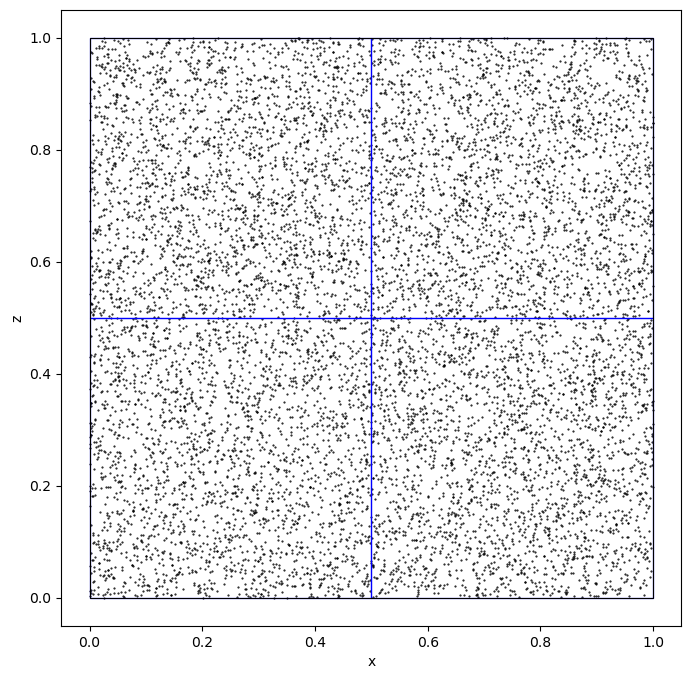

In [33]:
from matplotlib.patches import Rectangle

col=["k","blue", "green", "crimson", "orange", "yellow", "red"]
fig = plt.figure(figsize=(8,8))

for i in range(tree.shape[0]):
    plt.gca().add_patch(Rectangle((tree[ax1 + "_min"][i],tree[ax2+"_min"][i]),tree["side"+ax1][i],tree["side"+ax2][i],
                    edgecolor=col[tree["depth"][i]],
                    facecolor='none',
                    lw=0.8, zorder=10-tree["depth"][i]))
plt.plot(sdf[ax1], sdf[ax2], '.', color='k', ms=1)
plt.xlabel(ax1)
plt.ylabel(ax2)
plt.show()

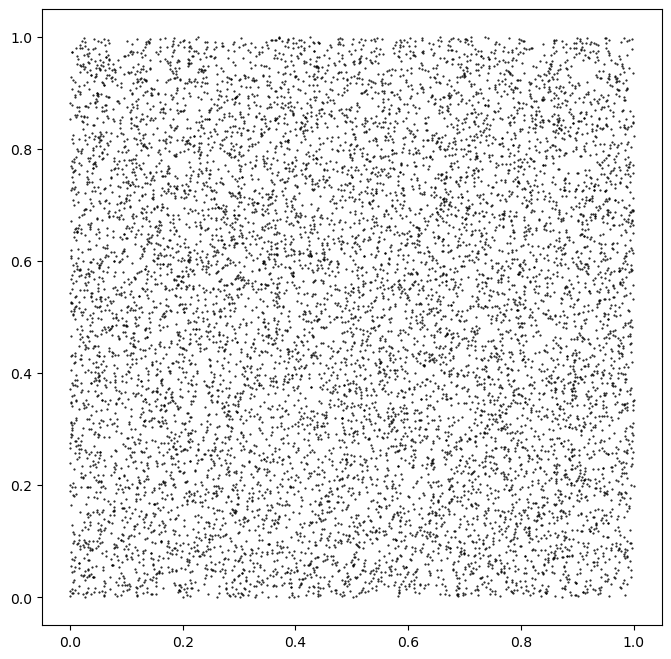

In [37]:
from matplotlib.patches import Rectangle

col=["k","blue", "green", "crimson", "orange", "yellow", "red"]
fig = plt.figure(figsize=(8,8))

for i in range(tree.shape[0]):
    if tree["depth"][i] == 2:
        plt.gca().add_patch(Rectangle((tree[ax1+"_min"][i],tree[ax2+"_min"][i]),tree["side"+ax1][i],tree["side"+ax2][i],
                    edgecolor=col[tree["depth"][i]],
                    facecolor='none',
                    lw=0.8))
plt.plot(sdf[ax1], sdf[ax2], '.', color='k', ms=1)
plt.show()

# Neighbor Finder

In [35]:
part = pd.read_csv('../Data/tree_algorithm/set_neighbors.csv')
particle = part["p"][0]
neighbors = part["p"][1:]

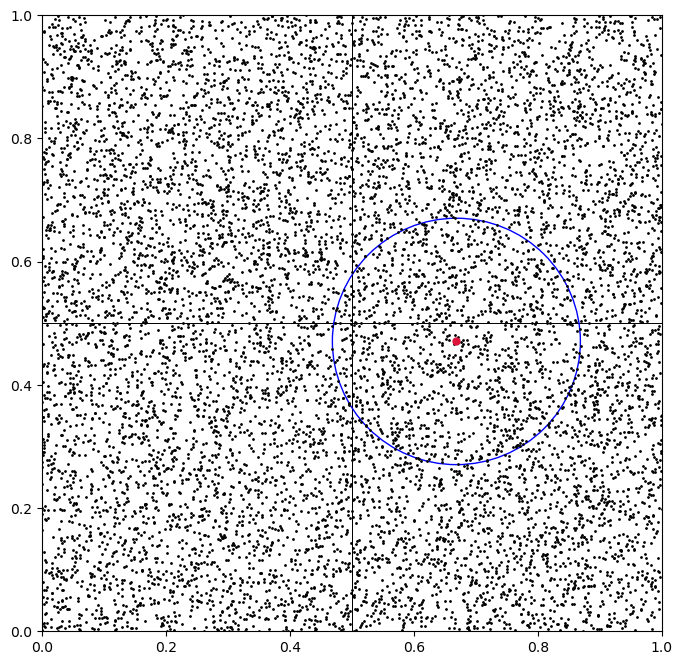

In [38]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
plt.plot(sdf[ax1], sdf[ax2], '.', color='k', ms=2)
plt.plot(sdf[ax1][neighbors], sdf[ax2][neighbors], '.', color='blue', ms=4)
plt.plot(sdf[ax1][particle], sdf[ax2][particle], 'o', color='crimson', ms=5)

for i in range(tree.shape[0]):
    plt.gca().add_patch(Rectangle((tree[ax1+"_min"][i],tree[ax2+"_min"][i]),tree["side"+ax1][i],tree["side"+ax2][i],
                    edgecolor="k",
                    facecolor='none',
                    lw=0.5))

compact_domain = plt.Circle((sdf[ax1][particle], sdf[ax2][particle]), 2*sdf["h"][particle], color='b', fill=False)
compact_domain2 = plt.Circle((sdf[ax1][particle], sdf[ax2][particle]+1.0), 2*sdf["h"][particle], color='b', fill=False)
compact_domain3 = plt.Circle((sdf[ax1][particle]+1.0, sdf[ax2][particle]+1.0), 2*sdf["h"][particle], color='b', fill=False)
compact_domain4 = plt.Circle((sdf[ax1][particle]+1.0, sdf[ax2][particle]), 2*sdf["h"][particle], color='b', fill=False)
compact_domain5 = plt.Circle((sdf[ax1][particle], sdf[ax2][particle]-1.0), 2*sdf["h"][particle], color='b', fill=False)
compact_domain6 = plt.Circle((sdf[ax1][particle]-1.0, sdf[ax2][particle]-1.0), 2*sdf["h"][particle], color='b', fill=False)
compact_domain7 = plt.Circle((sdf[ax1][particle]-1.0, sdf[ax2][particle]), 2*sdf["h"][particle], color='b', fill=False)
compact_domain8 = plt.Circle((sdf[ax1][particle]+1.0, sdf[ax2][particle]-1.0), 2*sdf["h"][particle], color='b', fill=False)
compact_domain9 = plt.Circle((sdf[ax1][particle]-1.0, sdf[ax2][particle]+1.0), 2*sdf["h"][particle], color='b', fill=False)
ax.add_patch(compact_domain)
ax.add_patch(compact_domain2)
ax.add_patch(compact_domain3)
ax.add_patch(compact_domain4)
ax.add_patch(compact_domain5)
ax.add_patch(compact_domain6)
ax.add_patch(compact_domain7)
ax.add_patch(compact_domain8)
ax.add_patch(compact_domain9)
ax.set_ylim(0,1.)
ax.set_xlim(0,1.)
plt.show()

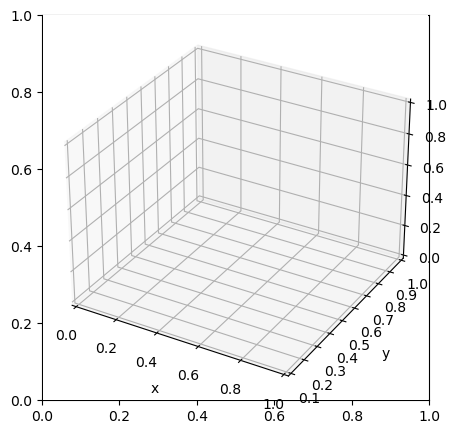

In [39]:
fig, ax = plt.subplots(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
#plt.plot(sdf['x'][neightbors], sdf['y'][particle], 'o', color='crimson', ms=5)

for ii in neighbors:
    ax.scatter([sdf['x'][ii]], [sdf['y'][ii]], [sdf['z'][ii]], color='blue', marker=".")

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.set_xlim(0,1)
ax.set_ylim(0.1)

plt.show()